In [1]:
# Gerekli kütüphaneleri import edelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Görselleştirmeler için stil ayarı
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Veri setini yükleyelim
df = pd.read_csv('healthcare_dataset.csv')

# İlk 5 satırı gözlemleyelim
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
# Veri setinin boyutunu kontrol edelim
# Bizden istenen 10.000 satır şartını sağlıyor
print(f"Veri seti boyutu: {df.shape}")
print(f"Satır sayısı: {df.shape[0]}, Sütun sayısı: {df.shape[1]}")

Veri seti boyutu: (55500, 15)
Satır sayısı: 55500, Sütun sayısı: 15


In [4]:
# Sütun isimlerini ve veri tiplerini kontrol edelim
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
# Eksik verileri kontrol edelim - null veri var mı ?
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [6]:
# Son satırda eksik veriler var, bu satırı çıkaralım
df = df.dropna()

# İsimleri standartlaştıralım (baş harfleri büyük, diğerleri küçük)
df['Name'] = df['Name'].str.title()
df['Gender'] = df['Gender'].str.title()
df['Blood Type'] = df['Blood Type'].str.upper()
df['Medical Condition'] = df['Medical Condition'].str.title()
df['Doctor'] = df['Doctor'].str.title()
df['Hospital'] = df['Hospital'].str.title()
df['Insurance Provider'] = df['Insurance Provider'].str.title()
df['Admission Type'] = df['Admission Type'].str.title()
df['Medication'] = df['Medication'].str.title()
df['Test Results'] = df['Test Results'].str.title()

# Tarih sütunlarını datetime formatına çevirelim
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Hastanede kalış süresini hesaplayalım
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,Elizabeth Jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal,30
55496,Kyle Perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal,9
55497,Heather Wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",Unitedhealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal,28
55498,Jennifer Jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal,6


In [7]:
# Temel istatistikler
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Name,55500,40235,Michael Williams,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,55500.0,NaN,NaN,NaN,51.539459,13.0,35.0,52.0,68.0,89.0,19.602454
Gender,55500,2,Male,27774,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood Type,55500,8,A-,6969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medical Condition,55500,6,Arthritis,9308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Admission,55500,NaN,NaN,NaN,2021-11-01 01:02:22.443243008,2019-05-08 00:00:00,2020-07-28 00:00:00,2021-11-01 00:00:00,2023-02-03 00:00:00,2024-05-07 00:00:00,NaN
Doctor,55500,40341,Michael Smith,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hospital,55500,39876,Llc Smith,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Insurance Provider,55500,5,Cigna,11249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Billing Amount,55500.0,NaN,NaN,NaN,25539.316097,-2008.49214,13241.224652,25538.069376,37820.508436,52764.276736,14211.454431


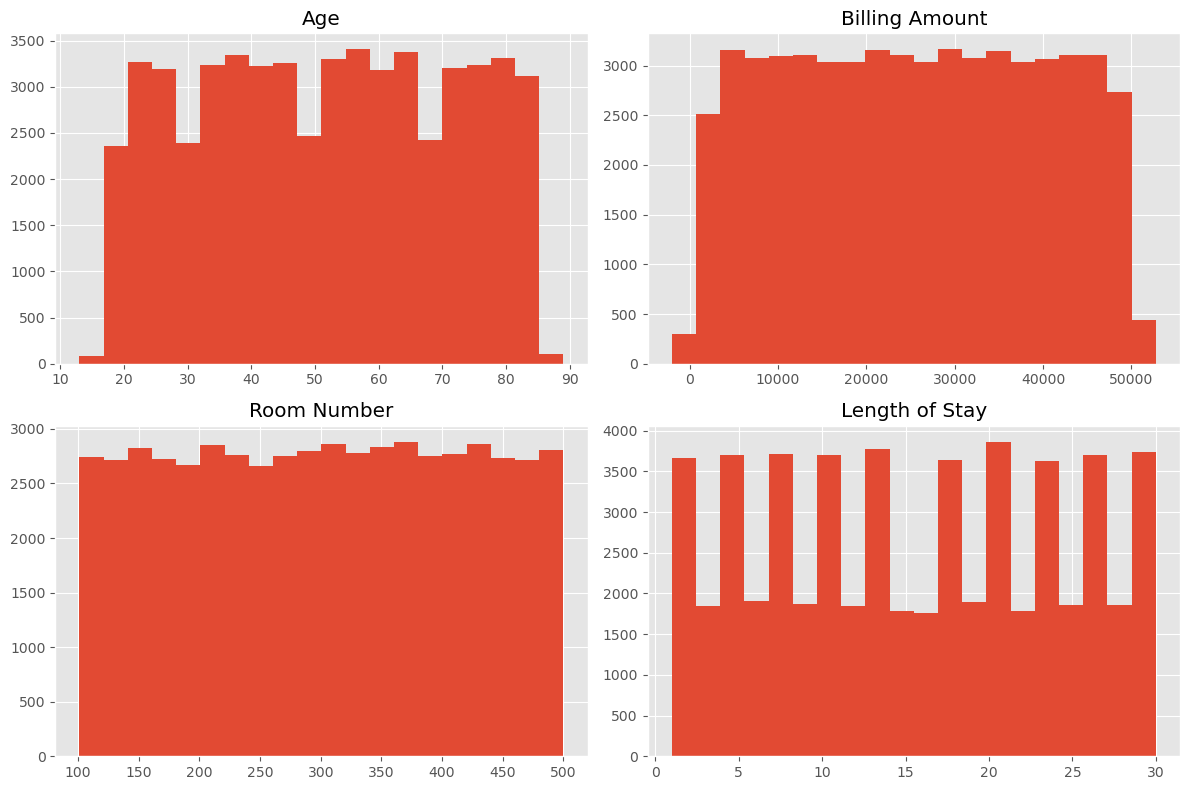

In [8]:
# Sayısal değişkenlerin dağılımı
num_cols = ['Age', 'Billing Amount', 'Room Number', 'Length of Stay']
df[num_cols].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

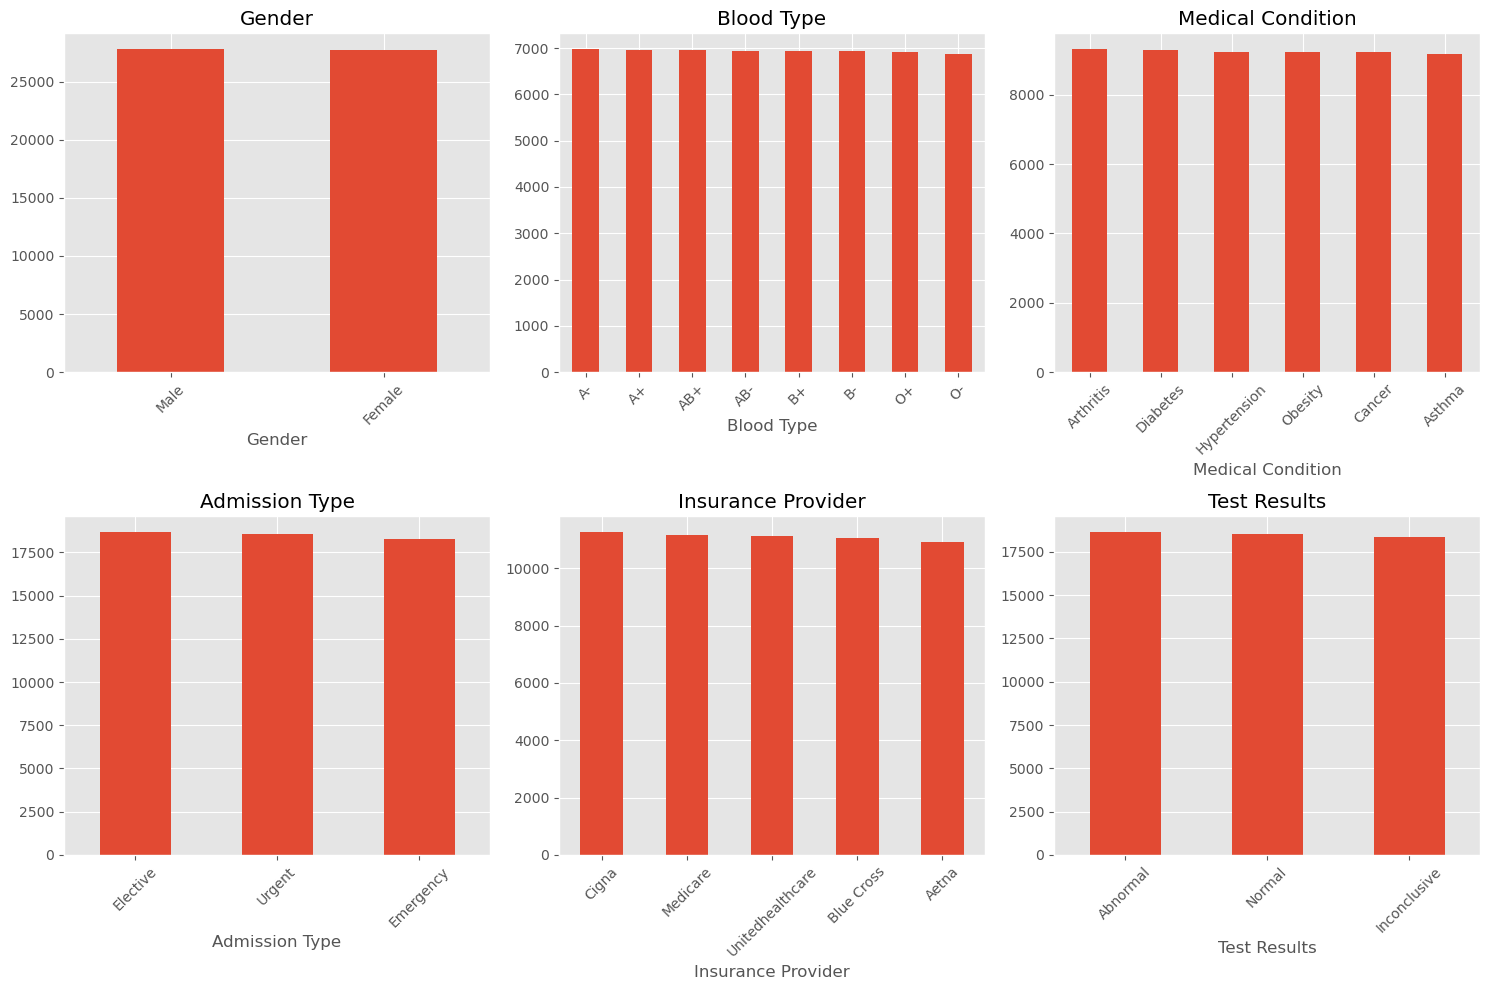

In [9]:
# Kategorik değişkenlerin dağılımı
cat_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Insurance Provider', 'Test Results']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

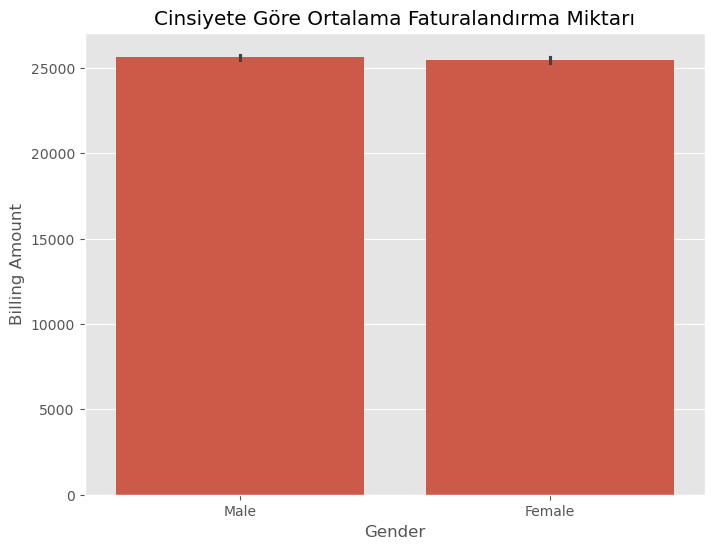

In [10]:
# Cinsiyete göre ortalama faturalandırma miktarı
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Billing Amount', data=df, estimator=np.mean)
plt.title('Cinsiyete Göre Ortalama Faturalandırma Miktarı')
plt.show()

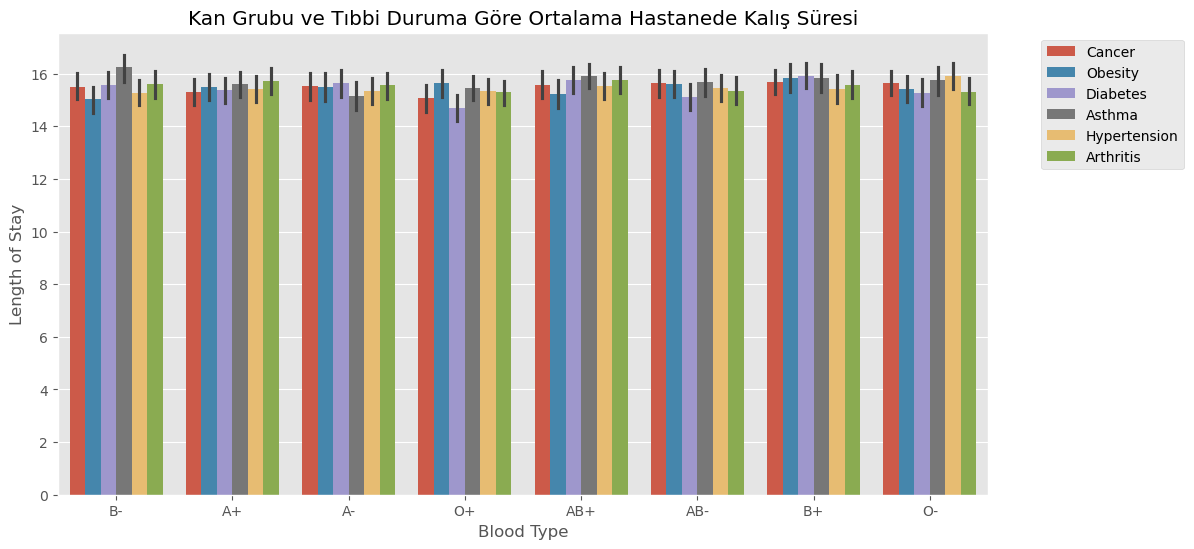

In [11]:
# Kan grubu ve tıbbi duruma göre ortalama hastanede kalış süresi
plt.figure(figsize=(12, 6))
sns.barplot(x='Blood Type', y='Length of Stay', hue='Medical Condition', data=df, estimator=np.mean)
plt.title('Kan Grubu ve Tıbbi Duruma Göre Ortalama Hastanede Kalış Süresi')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

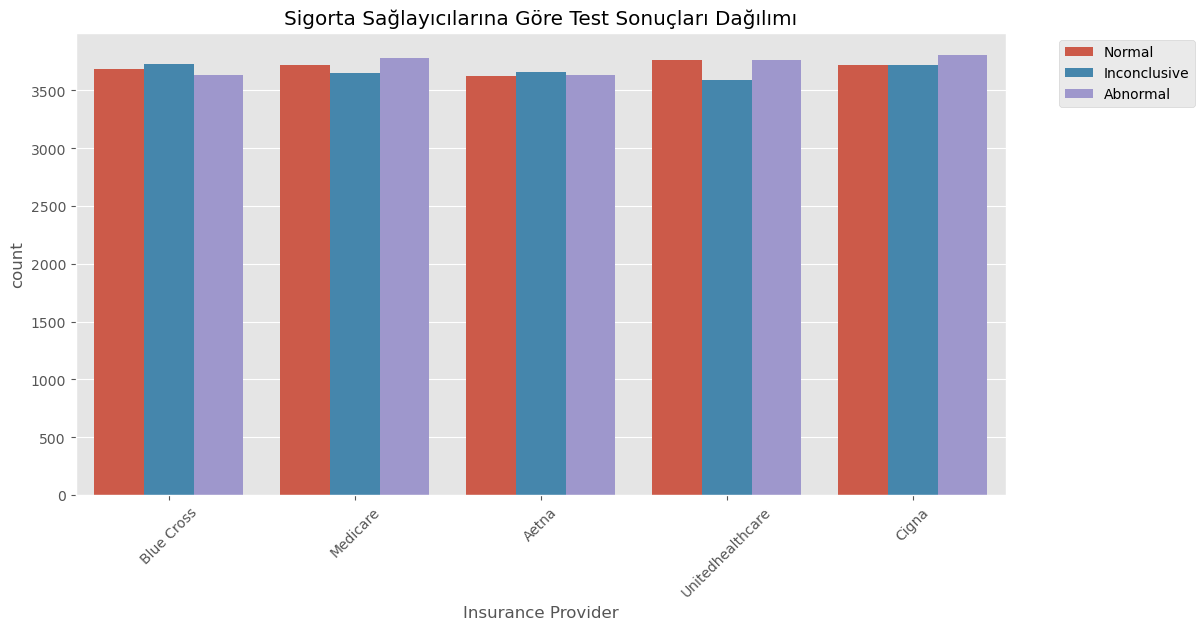

In [12]:
# Sigorta sağlayıcılarına göre test sonuçları dağılımı
plt.figure(figsize=(12, 6))
sns.countplot(x='Insurance Provider', hue='Test Results', data=df)
plt.title('Sigorta Sağlayıcılarına Göre Test Sonuçları Dağılımı')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

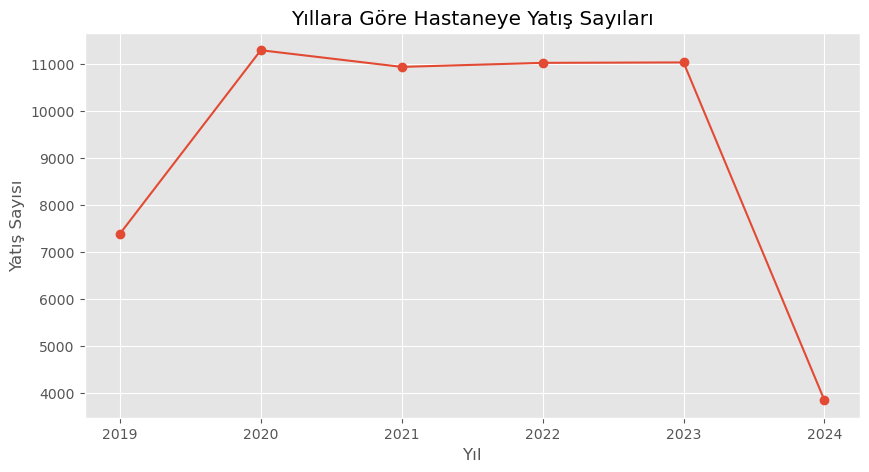

In [13]:
# Yıllara göre hastaneye yatış sayıları
df['Year of Admission'] = df['Date of Admission'].dt.year
admissions_by_year = df['Year of Admission'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
admissions_by_year.plot(kind='line', marker='o')
plt.title('Yıllara Göre Hastaneye Yatış Sayıları')
plt.xlabel('Yıl')
plt.ylabel('Yatış Sayısı')
plt.grid(True)
plt.show()

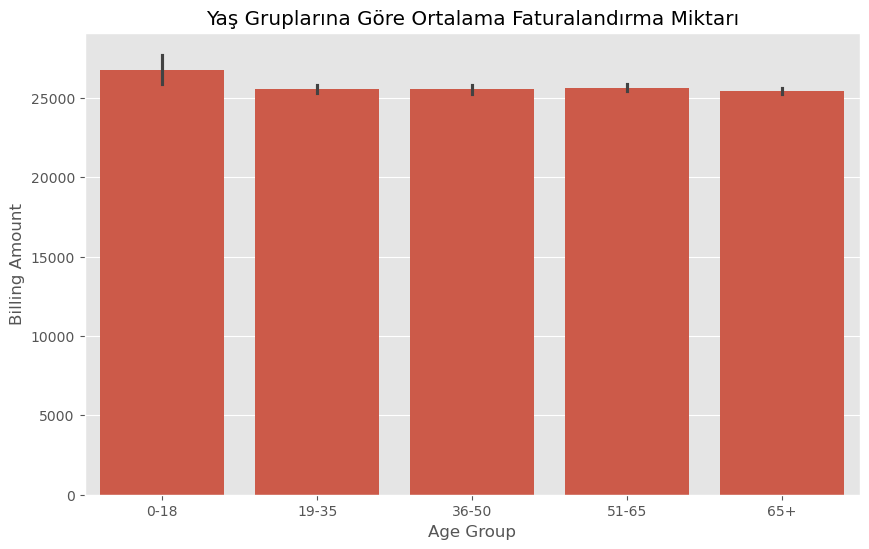

In [14]:
# Yaş grupları oluşturalım
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Yaş gruplarına göre ortalama faturalandırma
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Billing Amount', data=df, estimator=np.mean)
plt.title('Yaş Gruplarına Göre Ortalama Faturalandırma Miktarı')
plt.show()

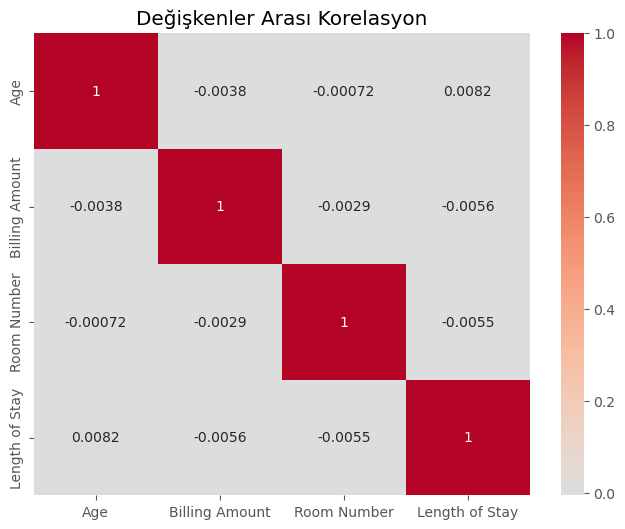

In [15]:
# Korelasyon analizi
corr = df[['Age', 'Billing Amount', 'Room Number', 'Length of Stay']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Değişkenler Arası Korelasyon')
plt.show()

In [16]:
# Önemli bulguları özetleyelim
print("Önemli Bulgular:")
print(f"- En yaygın tıbbi durum: {df['Medical Condition'].mode()[0]}")
print(f"- En yaygın kan grubu: {df['Blood Type'].mode()[0]}")
print(f"- Ortalama hastanede kalış süresi: {df['Length of Stay'].mean():.1f} gün")
print(f"- En yüksek ortalama faturalandırma miktarı olan sigorta sağlayıcısı: {df.groupby('Insurance Provider')['Billing Amount'].mean().idxmax()}")
print(f"- Test sonuçlarının dağılımı:\n{df['Test Results'].value_counts(normalize=True) * 100}")

Önemli Bulgular:
- En yaygın tıbbi durum: Arthritis
- En yaygın kan grubu: A-
- Ortalama hastanede kalış süresi: 15.5 gün
- En yüksek ortalama faturalandırma miktarı olan sigorta sağlayıcısı: Medicare
- Test sonuçlarının dağılımı:
Test Results
Abnormal        33.562162
Normal          33.363964
Inconclusive    33.073874
Name: proportion, dtype: float64
